In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/vamsh/Downloads/stock_infosys.csv")

In [3]:
df.head()

,Date,Close,Open,High,Low,Vol-Million,Change %
0,"Jun 18, 2018",1269.20,1281.80,1291.00,1264.05,2.86,-0.01
1,"Jun 15, 2018",1281.25,1237.00,1291.50,1235.00,9.98,0.03
2,"Jun 14, 2018",1239.70,1253.00,1253.00,1234.10,3.80,-0.02
3,"Jun 13, 2018",1264.80,1256.86,1273.93,1256.86,2.88,0.01
4,"Jun 12, 2018",1248.63,1255.82,1261.28,1240.64,3.92,0.00


In [4]:
df.isna().sum()

Date           0
Close          0
Open           0
High           0
Low            0
Vol-Million    0
Change %       0
dtype: int64

In [5]:
df.shape

(249, 7)

In [6]:
df.tail()

,Date,Close,Open,High,Low,Vol-Million,Change %
244,"Jun 23, 2017",943.25,945.00,949.15,938.00,3.20,0.00
245,"Jun 22, 2017",940.15,947.70,968.70,935.10,4.73,0.00
246,"Jun 21, 2017",943.35,945.00,949.00,936.05,1.87,0.00
247,"Jun 20, 2017",943.55,935.00,946.90,934.05,2.59,0.01
248,"Jun 19, 2017",929.85,939.95,940.25,928.00,3.43,-0.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         249 non-null    object 
 1   Close        249 non-null    float64
 2   Open         249 non-null    float64
 3   High         249 non-null    float64
 4   Low          249 non-null    float64
 5   Vol-Million  249 non-null    float64
 6   Change %     249 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         249 non-null    datetime64[ns]
 1   Close        249 non-null    float64       
 2   Open         249 non-null    float64       
 3   High         249 non-null    float64       
 4   Low          249 non-null    float64       
 5   Vol-Million  249 non-null    float64       
 6   Change %     249 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.7 KB


In [10]:
df["Date"] = df["Date"].dt.strftime("%y%j")
df.head()

,Date,Close,Open,High,Low,Vol-Million,Change %
0,18169,1269.20,1281.80,1291.00,1264.05,2.86,-0.01
1,18166,1281.25,1237.00,1291.50,1235.00,9.98,0.03
2,18165,1239.70,1253.00,1253.00,1234.10,3.80,-0.02
3,18164,1264.80,1256.86,1273.93,1256.86,2.88,0.01
4,18163,1248.63,1255.82,1261.28,1240.64,3.92,0.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         249 non-null    object 
 1   Close        249 non-null    float64
 2   Open         249 non-null    float64
 3   High         249 non-null    float64
 4   Low          249 non-null    float64
 5   Vol-Million  249 non-null    float64
 6   Change %     249 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [12]:
# Though it is a string column DT doesn't care about the datatye of the column

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df[["Date","Close","Open","Low"]]
y = df["High"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 1, shuffle = True)

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt = DecisionTreeRegressor()

In [45]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

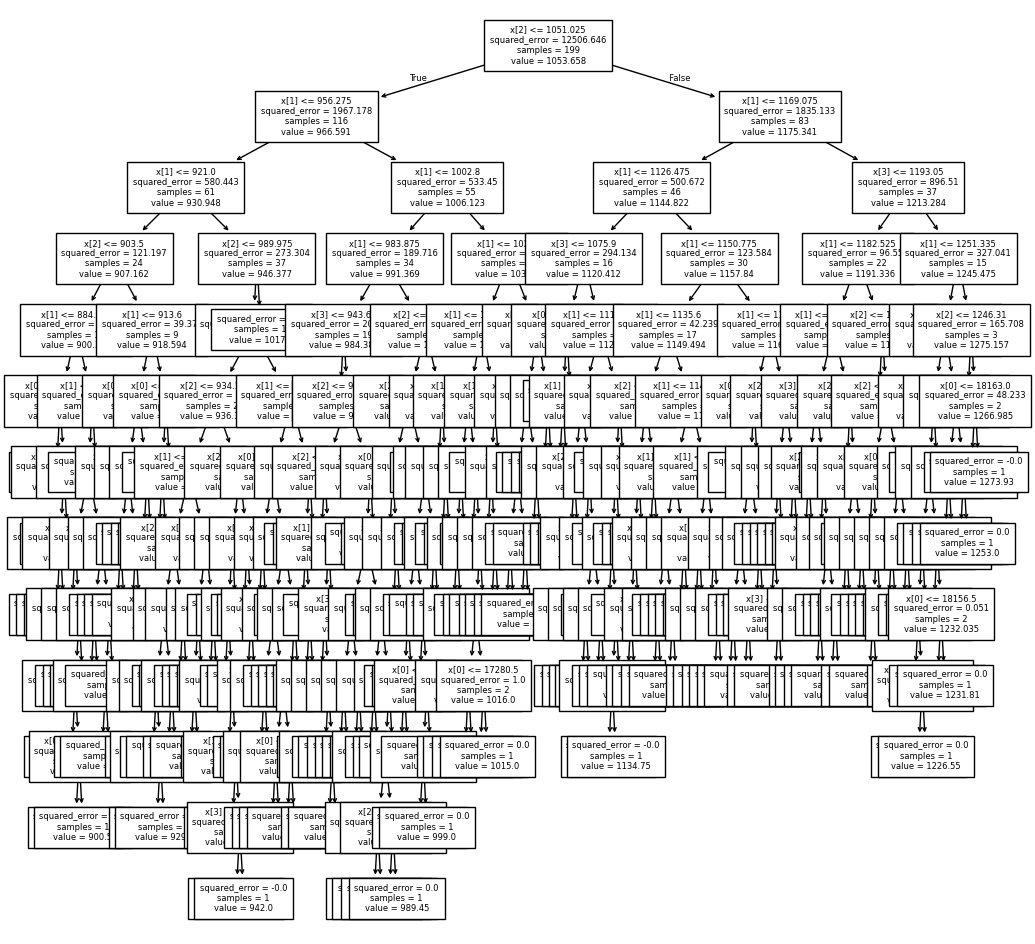

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(dt, fontsize=6)
plt.show()

In [47]:
dt.score(xtest, ytest)

0.9892941916414153

In [48]:
dt.score(xtrain, ytrain)

1.0

In [49]:
ypred = dt.predict(xtest)

In [50]:
# Accuracy
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.9892941916414153

In [51]:
# Error Metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred)

147.1962660000002

In [52]:
# dt = DecisionTreeRegressor(max_depth = 5)
# This gives the max size that a tree can grow to reduce the computational cost